In [19]:
#!/usr/bin/env python3
"""Ce script permet de lire un fichier RTTOV, d’en extraire les principales variables physiques 
(températures, vapeur d’eau, jacobiens), puis de visualiser ces champs sous forme de cartes à l’aide 
de nuages de points géoréférencés (pour les variables à 2D), ou plot (pour les profiles).
Il est conçu comme un outil de diagnostic et d’exploration des sorties RTTOV avant leur utilisation dans un algorithme bayésien."""

import xarray as xr
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import os

# =========================
# 1) Lecture
# =========================
fname = "rttov_CALISTA_LC09_L1C_204025_20240118.nc"
rttov_date = fname[-11:-3]
rrtov_year = fname[-11:-7]
d = datetime.strptime(rttov_date, "%Y%m%d")
day_str = f"{d.timetuple().tm_yday:03d}"
print(day_str)

root = "/espace/home/datawork-cersat-public/cache/users/trishna/data/rttov/bayesian_input/"
ds = xr.open_dataset(root + fname)

rttov_date = fname[-11:-3]
OUT_BASE = os.path.join('/espace/home/datawork-cersat-public/cache/users/trishna/processing_KC/result/bayesian')
OUT_BASE2 = "plots_rttov_adapted"
outdir = os.path.join(OUT_BASE, rttov_date, OUT_BASE2)
os.makedirs(outdir, exist_ok=True)
print('outdir',outdir)

# Coordonnées
lat = ds["lat"].values
lon = ds["lon"].values

# Température de surface
ST = ds["Skin"].values

# Température de brillance
BT = ds["BtRefl"]
BT10 = BT.isel(y=0).values
BT11 = BT.isel(y=0).values

# Colonne d'eau totale
TWCV = ds["twvc"].values

# Jacobians
ST_jacobian = ds["SkinK"]      # (x, y)
twvcK_jacobian = ds["twvcK"]   # (x, y)

# Canaux
ST_jacobian10 = ST_jacobian.isel(y=0).values
ST_jacobian11 = ST_jacobian.isel(y=1).values

twvcK_jacobian10 = twvcK_jacobian.isel(y=0).values
twvcK_jacobian11 = twvcK_jacobian.isel(y=1).values

# def scatter_map(lon, lat, data, title, cbar_label,
#                 cmap="viridis", vmin=None, vmax=None,
#                 size=15, outfile=None):
def scatter_map(lon, lat, data, title, cbar_label,
                cmap="viridis", vmin=None, vmax=None,
                size=15, fname=None):

    plt.figure(figsize=(8,6))
    sc = plt.scatter(
        lon, lat,
        c=data,
        cmap=cmap,
        s=size,
        vmin=vmin, vmax=vmax
    )
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title(title)
    plt.colorbar(sc, label=cbar_label)
    plt.tight_layout()

    # if outfile is not None:
    if fname is not None:
        plt.savefig(
            os.path.join(outdir, fname + ".png"),
            dpi=300,
            bbox_inches="tight")
        #plt.savefig(outfile, dpi=300, bbox_inches="tight")

    plt.show()


018
outdir /espace/home/datawork-cersat-public/cache/users/trishna/processing_KC/result/bayesian/20240118/plots_rttov_adapted


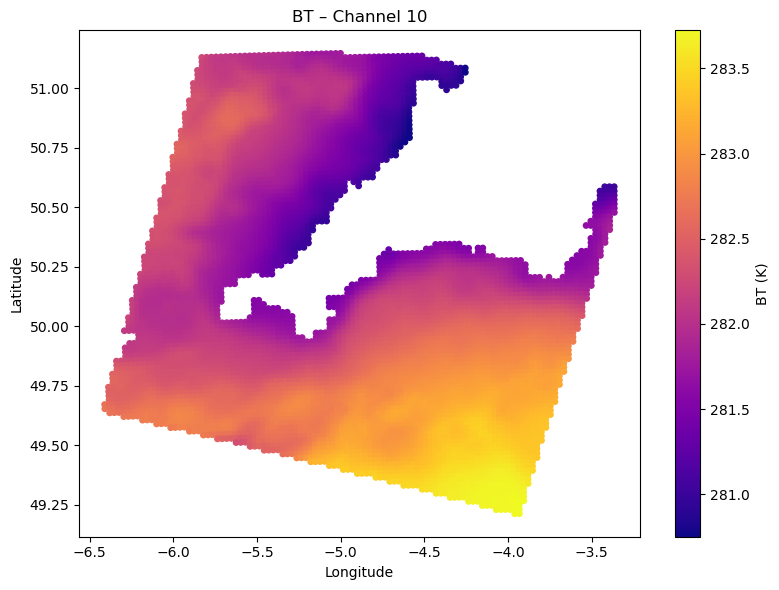

In [27]:
scatter_map(
    lon, lat, BT10,
    title="BT – Channel 10",
    cbar_label="BT (K)",
    cmap="plasma",
    fname=f"BT10_map_{rttov_date}"
)


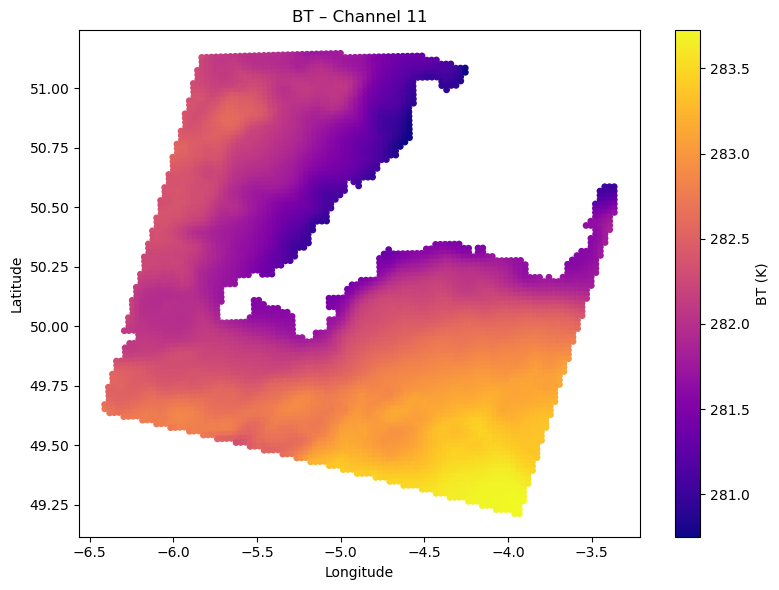

In [26]:
scatter_map(
    lon, lat, BT11,
    title="BT – Channel 11",
    cbar_label="BT (K)",
    cmap="plasma",
    fname=f"BT11_map_{rttov_date}"
)

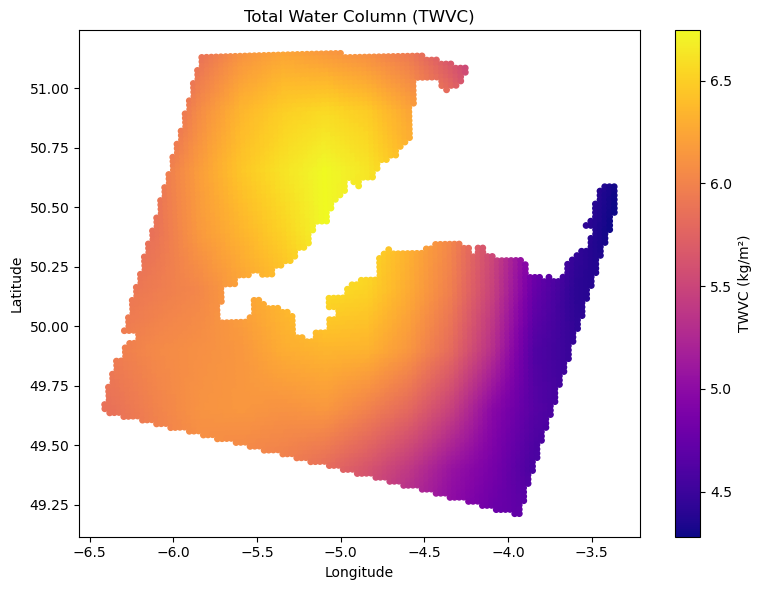

In [28]:
scatter_map(
    lon, lat, TWCV,
    title="Total Water Column (TWVC)",
    cbar_label="TWVC (kg/m²)",
    cmap="plasma",
    fname=f"TWVC_map_{rttov_date}"
)


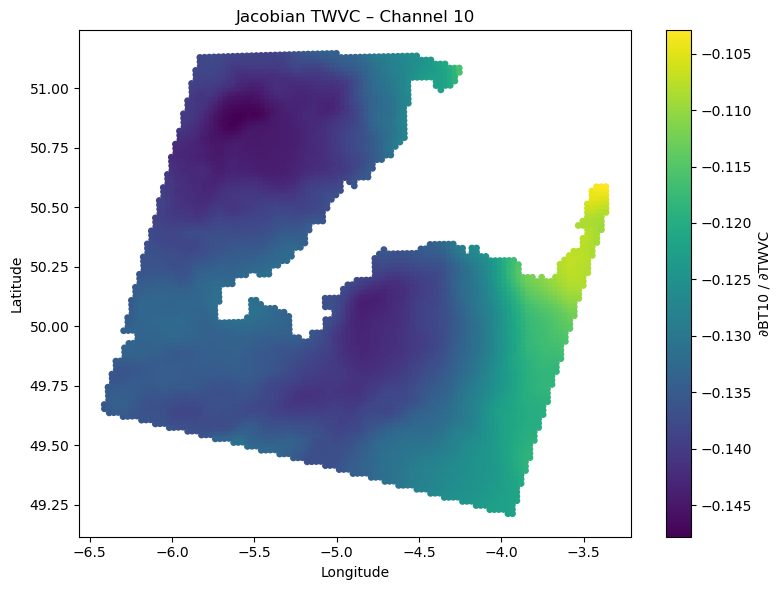

In [53]:
scatter_map(
    lon, lat, twvcK_jacobian10,
    title="Jacobian TWVC – Channel 10",
    cbar_label="∂BT10 / ∂TWVC",
    cmap="viridis",
    fname=f"Jacobian_TWVC_B10_{rttov_date}"
)


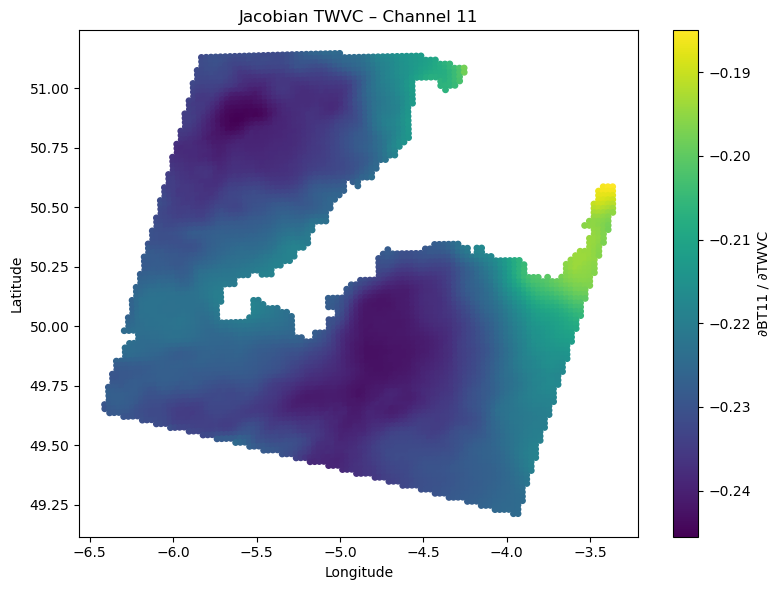

In [54]:
scatter_map(
    lon, lat, twvcK_jacobian11,
    title="Jacobian TWVC – Channel 11",
    cbar_label="∂BT11 / ∂TWVC",
    cmap="viridis",
    fname=f"Jacobian_TWVC_B11_{rttov_date}"
)

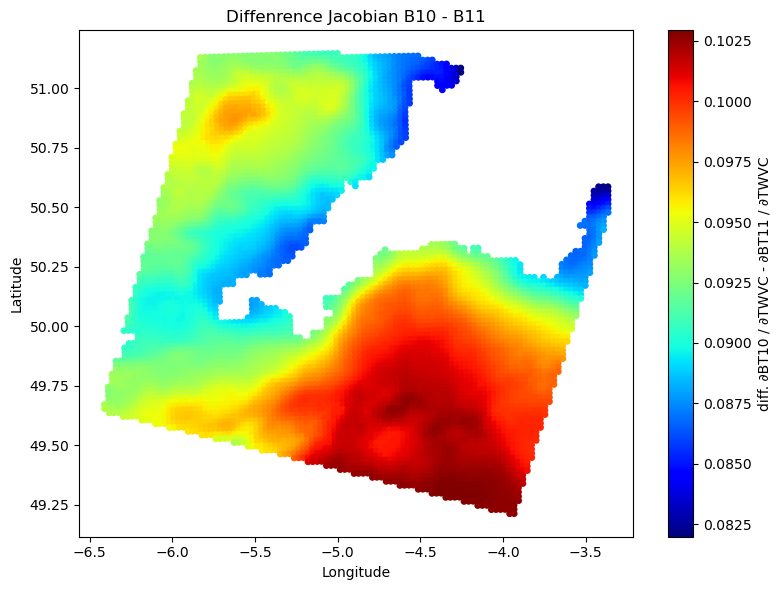

In [55]:
scatter_map(
    lon, lat, twvcK_jacobian10 - twvcK_jacobian11,
    title="Diffenrence Jacobian B10 - B11",
    cbar_label="diff. ∂BT10 / ∂TWVC - ∂BT11 / ∂TWVC",
    cmap="jet",
    fname=f"difference_Jacobian_TWVC_B10B11_{rttov_date}"
)

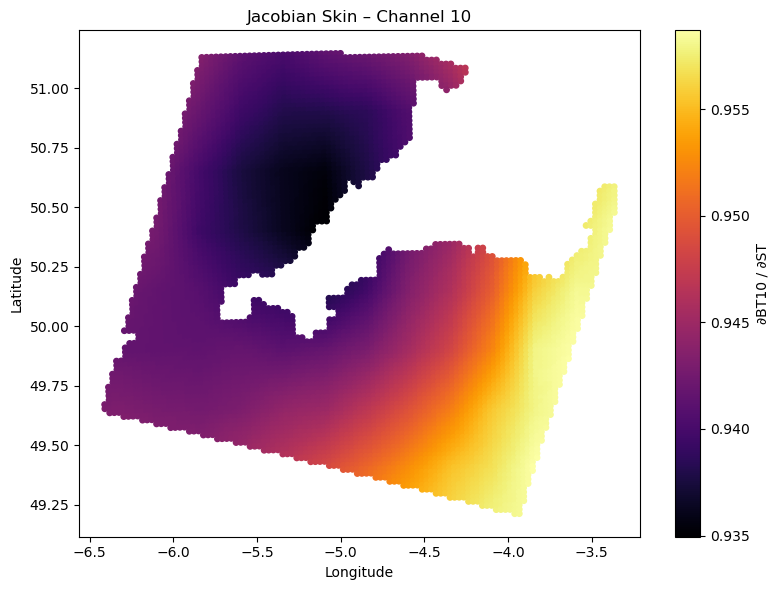

In [56]:
scatter_map(
    lon, lat, ST_jacobian10,
    title="Jacobian Skin – Channel 10",
    cbar_label="∂BT10 / ∂ST",
    cmap="inferno",
    fname=f"Jacobian_ST_B10_{rttov_date}"
)


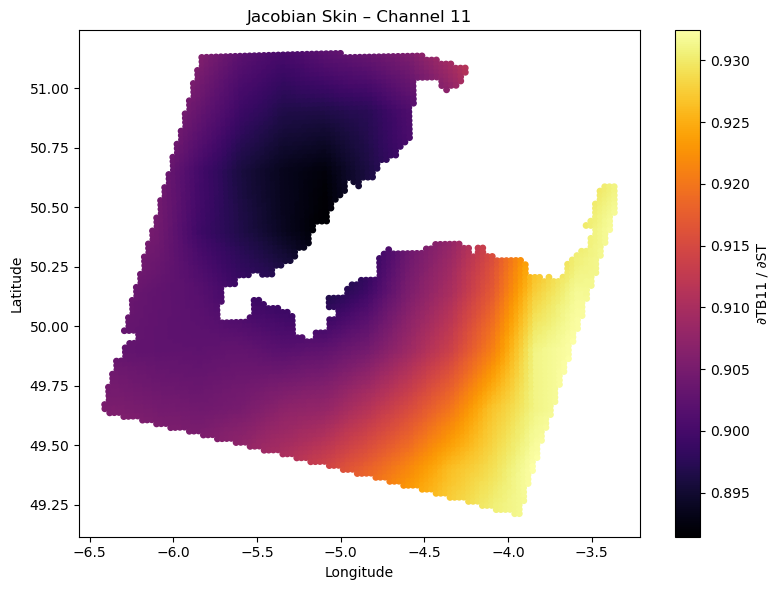

In [57]:
scatter_map(
    lon, lat, ST_jacobian11,
    title="Jacobian Skin – Channel 11",
    cbar_label="∂TB11 / ∂ST",
    cmap="inferno",
    fname=f"Jacobian_ST_B11_{rttov_date}"
)


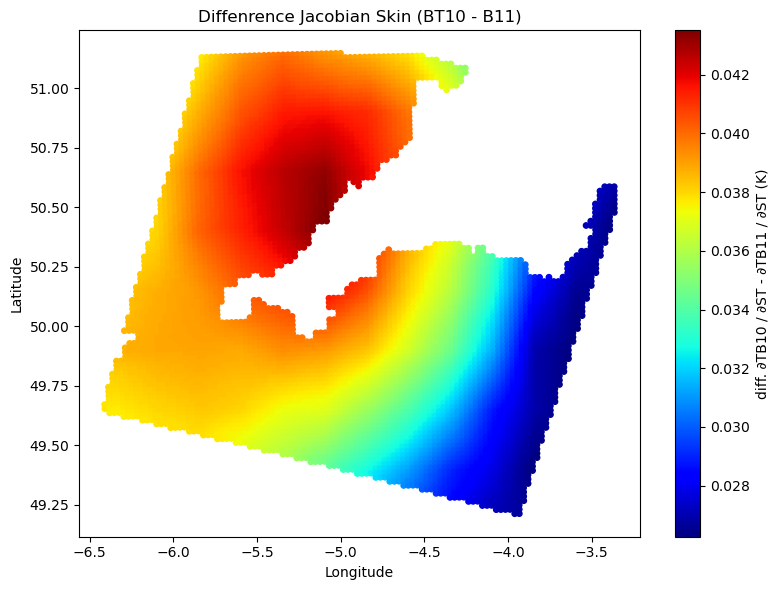

In [58]:
scatter_map(
    lon, lat, ST_jacobian10 - ST_jacobian11,
    title="Diffenrence Jacobian Skin (BT10 - B11)",
    cbar_label="diff. ∂TB10 / ∂ST - ∂TB11 / ∂ST (K)",
    cmap="jet",
    fname=f"difference_Jacobian_ST_B10B11_{rttov_date}"
)


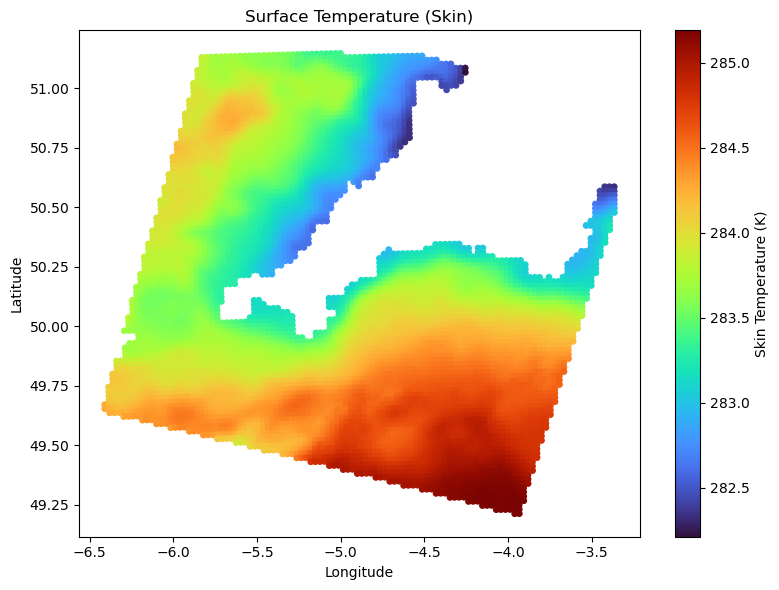

In [59]:
scatter_map(
    lon, lat, ST,
    title="Surface Temperature (Skin)",
    cbar_label="Skin Temperature (K)",
    cmap="turbo",
    fname=f"ST_{rttov_date}"
)

/tmp/ipykernel_27427/2438003568.py:1: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  x = ds.dims["x"] # nombre de pixel
/tmp/ipykernel_27427/2438003568.py:2: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  z = ds.dims["z"] # nombre de niveau
/tmp/ipykernel_27427/2438003568.py:3: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  y = ds.dims["y"] # nombre de canal (bande)


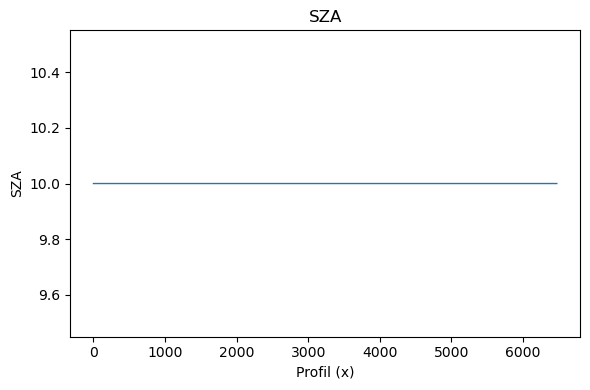

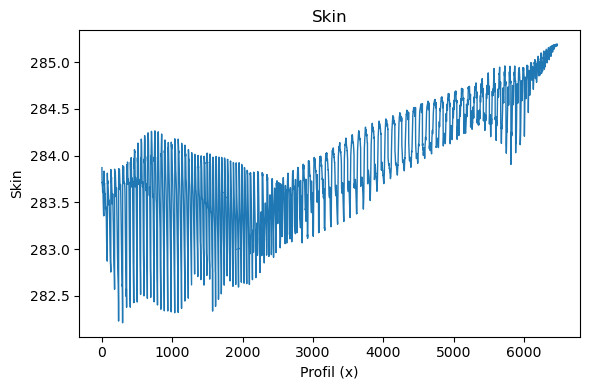

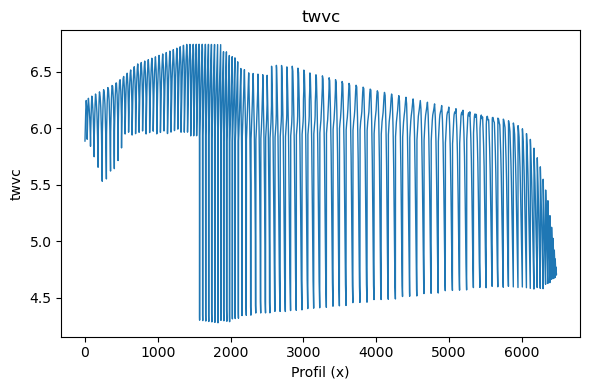

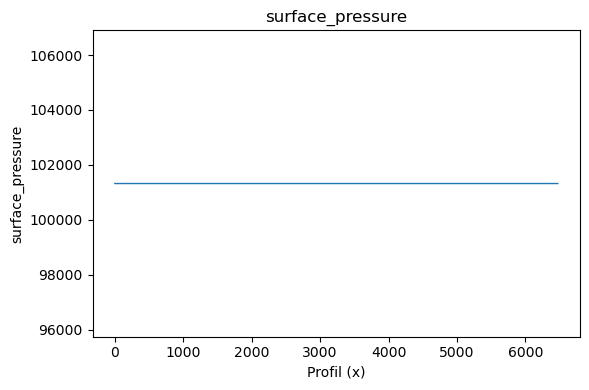

In [29]:
x = ds.dims["x"] # nombre de pixel
z = ds.dims["z"] # nombre de niveau
y = ds.dims["y"] # nombre de canal (bande)

# =========================
# 2) Variables 1D (x)
# =========================
vars_1d = ["SZA", "Skin", "twvc", "surface_pressure"]

for v in vars_1d:
    if v in ds:
        plt.figure(figsize=(6, 4))
        plt.plot(ds[v], lw=1)
        plt.title(v)
        plt.xlabel("Profil (x)")
        plt.ylabel(v)
        plt.tight_layout()
        #plt.savefig(f"{outdir}/{v}_1D.png", dpi=200)
        #plt.close()

In [17]:
# =========================
# 3) Profils verticaux moyens (x,z)
# =========================
vars_xz = ["T", "Q"]
# Pression moyenne par niveau
P_mean = ds["P"].mean(dim="x")

for v in vars_xz:
    if v in ds:
        mean_profile = ds[v].mean(dim="x")

        plt.figure(figsize=(5, 6))
        # plt.plot(mean_profile, ds["nlevels"])
        # plt.plot(mean_profile, ds["P"])
        plt.plot(mean_profile, P_mean, lw=2)
        plt.gca().invert_yaxis()
        plt.title(f"Mean vertical profile : {v}")
        plt.xlabel(v)
        plt.ylabel("Pressure level (hPa)")
        plt.tight_layout()
        plt.savefig(f"{outdir}/{v}_mean_profile.png", dpi=200)
        plt.close()

In [26]:
# =========================
# 4) Coupes x–z
# =========================
for v in vars_xz:
    if v in ds:
        plt.figure(figsize=(8, 4))
        plt.pcolormesh(
            ds[v].T,
            shading="auto",
            cmap="turbo"
        )
        plt.gca().invert_yaxis()
        plt.colorbar(label=v)
        plt.xlabel("Profil (x)")
        plt.ylabel("Niveau (z)")
        plt.title(f"Coupe x–z : {v}")
        plt.tight_layout()
        plt.savefig(f"{outdir}/{v}_xz.png", dpi=200)
        plt.close()

In [27]:
# =========================
# 5) QK : x–z par canal
# =========================
if "QK" in ds:
    for ich in range(y):
        plt.figure(figsize=(8, 4))
        plt.pcolormesh(
            ds["QK"].isel(y=ich).T,
            shading="auto",
            cmap="magma"
        )
        plt.colorbar(label="QK")
        plt.xlabel("Profil (x)")
        plt.ylabel("Niveau (z)")
        plt.title(f"QK – canal {ich}")
        plt.tight_layout()
        plt.savefig(f"{outdir}/QK_xz_channel_{ich}.png", dpi=200)
        plt.close()


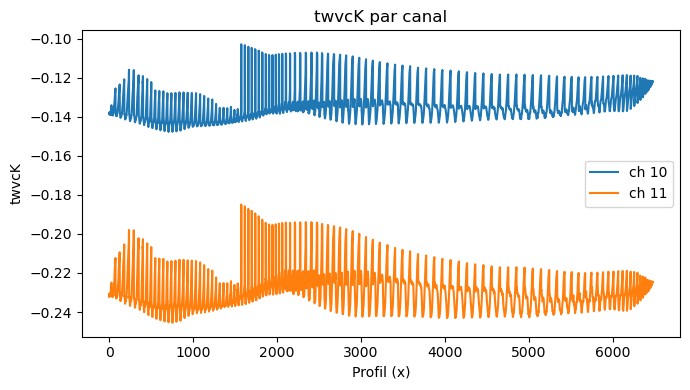

In [37]:

# =========================
# 6) twvcK par canal
# =========================
if "twvcK" in ds:
    plt.figure(figsize=(7, 4))
    for ich in range(y):
        plt.plot(ds["twvcK"].isel(y=ich), label=f"ch 1{ich}")
    plt.legend()
    plt.xlabel("Profil (x)")
    plt.ylabel("twvcK")
    plt.title("twvcK par canal")
    plt.tight_layout()
    # plt.savefig(f"{outdir}/twvcK_channels.png", dpi=200)
    # plt.close()


Tracés RTTOV adaptés terminés.


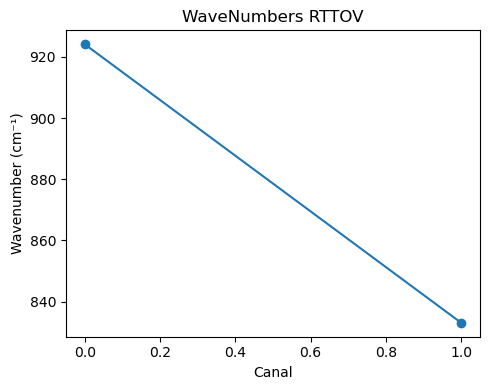

In [33]:
# =========================
# 7) Wavenumbers
# =========================
if "WaveNumbers" in ds:
    plt.figure(figsize=(5, 4))
    plt.plot(ds["WaveNumbers"], marker="o")
    plt.xlabel("Canal")
    plt.ylabel("Wavenumber (cm⁻¹)")
    plt.title("WaveNumbers RTTOV")
    plt.tight_layout()
    # plt.savefig(f"{outdir}/WaveNumbers.png", dpi=200)
    # plt.close()

print("Tracés RTTOV adaptés terminés.")
